In [ ]:
Moving average convergence and divergence

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

In [23]:
df = yf.download('TSLA', start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [24]:
def MACD(df):
    df['EMA12'] = df.Close.ewm(span=12).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26            #12 period Expotetial moving Avg - 26 period EMA
    df['signal'] = df.MACD.ewm(span=9).mean()
    print('indicator added')

In [25]:
MACD(df)

indicator added


In [26]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,148949700,235.223328,235.223328,0.000000,0.000000
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,239.574720,239.394485,0.180235,0.100131
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,241.706519,241.421666,0.284853,0.175837
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,244.953664,244.377042,0.576622,0.311604
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,252.305680,250.786013,1.519668,0.670976
...,...,...,...,...,...,...,...,...,...,...
2022-09-09,291.670013,299.850006,291.250000,299.679993,299.679993,54338100,286.295058,285.039781,1.255277,2.075210
2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600,289.083513,286.475354,2.608159,2.181800
2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600,289.552204,286.894217,2.657987,2.277038


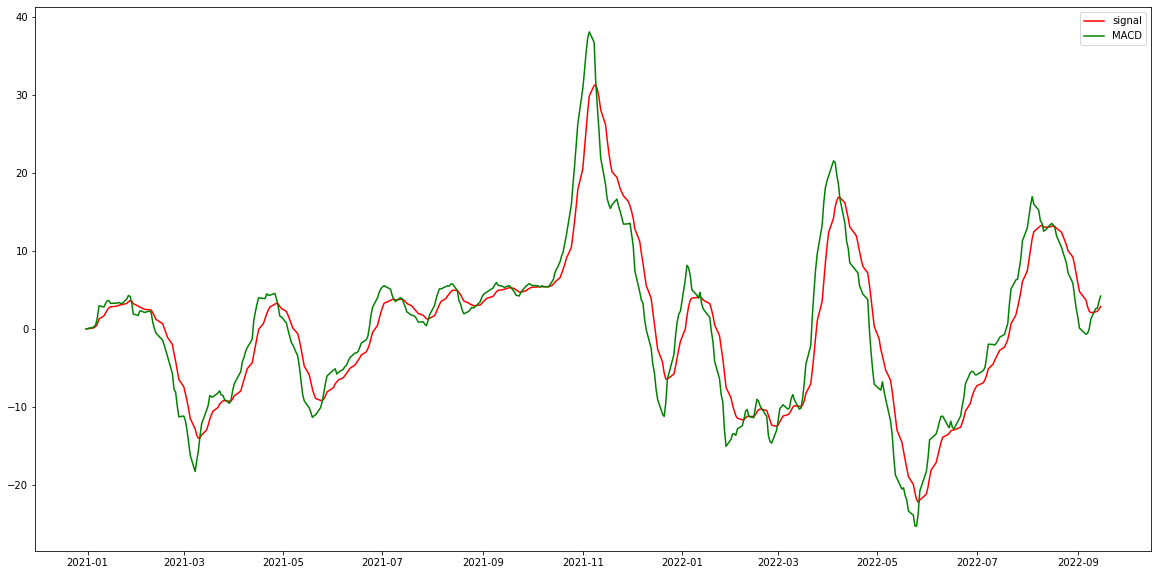

In [49]:
plt.figure(figsize=(20,10))
plt.plot(df.signal, label='signal',color='red')
plt.plot(df.MACD, label='MACD',color='green')
plt.legend()
plt.show()

# Buy when MACD crosses above the signal line
# Sell when MACD crocess below th signal line

In [42]:
Buy,Sell=[],[]

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)

In [43]:
len(Buy)

18

In [44]:
len(Sell)

18

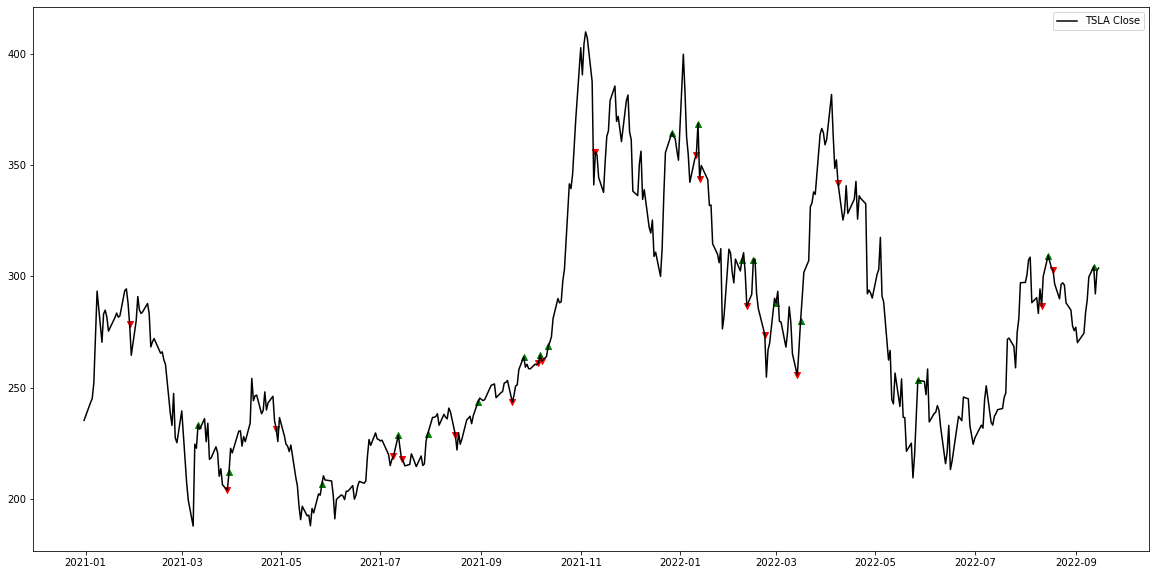

In [50]:
plt.figure(figsize=(20,10))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker="^",color='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker="v",color='red')
plt.plot(df.Close, label='TSLA Close',color='k')
plt.legend()
plt.show()